In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# **PRE- PROCESSING**

## ***.txt FILE Process***

**Assamese Characters Removed**

In [ ]:
text_to_remove=[")ৰ",")ত","’ৰ","'","’","‘","-","–","=",": ","“","/","”",","," ৷"," ৷ ","। ","…"," ।","।"
                "© 2018 - Maintained by EZEN Software & Technology Pvt. Ltd © 2018 - Maintained by EZEN Software & Technology Pvt. Ltd","2018 . 2018 .",
                "— ","@",". . . 3 4  10 2023"]

with open(news18_dataset, "r", encoding="utf-8") as file:
    file_content = file.read()

updated_content = file_content
for text in text_to_remove:
    updated_content = updated_content.replace(text, "")

with open(news18_dataset, "w", encoding="utf-8") as file:
    file.write(updated_content)

**Delete Specific Lines**

In [ ]:
# def delete_lines(file_path, start_line, end_line):
#     with open(file_path, 'r', encoding='utf-8') as file:
#         lines = file.readlines()

#     # Remove the specified range of lines
#     del lines[start_line-1:end_line]

#     with open(file_path, 'w', encoding='utf-8') as file:
#         file.writelines(lines)

# file_path = 'nenow_link.txt'  # Replace with the path to your text file
# start_line = 3015
# end_line = 3029

# delete_lines(file_path, start_line, end_line)

**Remove Links**

In [ ]:
import re

def remove_links(text):
    # Regular expression to match URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

    # Replace URLs with a space using re.sub
    cleaned_text = re.sub(url_pattern, ' ', text)

    return cleaned_text

input_file = news18_dataset
output_file = news18_dataset

with open(input_file, 'r', encoding='utf-8') as file:
    content = file.read()

# Remove links from the content
cleaned_content = remove_links(content)

# Write the cleaned content to the output file
with open(output_file, 'w', encoding='utf-8') as file:
    file.write(cleaned_content)

**Remove Emoji**

In [ ]:
def remove_emoji(text):
  if text != "":
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # Emoticons
                                  u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                                  u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                                  u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                                  u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                  u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                  u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                  u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                  u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                  u"\U0001F000-\U0001F0CF"  # Mahjong Tiles
                                  u"\U00002702-\U000027B0"  # Dingbats
                                  u"\U000024C2-\U0001F251"
                                  "]+", flags=re.UNICODE)


    cleaned_text = emoji_pattern.sub(' ', text)
    return cleaned_text
  else:
    return text

with open(input_file, 'r', encoding='utf-8') as file:
    lines = file.readlines()

processed_lines = []
previous_line = ""

for line in lines:
    line=remove_emoji(line)
    processed_lines.append(line)

with open(output_file, 'w', encoding='utf-8') as file:
    file.writelines(processed_lines)

**Remove Empty Lines**

In [ ]:
input_file = news18_dataset
output_file = news18_dataset

with open(input_file, 'r', encoding='utf-8') as file:
    lines = file.readlines()

processed_lines = []
previous_line = ""

for line in lines:
    if line.strip() == "" and previous_line.strip() == "":
        continue  # Skip extra consecutive empty lines
    processed_lines.append(line)
    previous_line = line

with open(output_file, 'w', encoding='utf-8') as file:
    file.writelines(processed_lines)

print("Processing complete. Processed data saved in", output_file)

Processing complete. Processed data saved in /content/drive/MyDrive/ML/csv_files/new18_dataset.txt


**REMOVE ENGLISH ALPHABETS & CHARACTERS**

In [ ]:
import re

def remove_dirt_alpha(text, is_body):
    if is_body:
        text = re.sub(r'Also read:.*', ' ', text)

    text = re.sub(r'[a-zA-Z]', ' ', text)
    text = re.sub(r"[<>()|&©ø\[\]\'\",;#?~*!]", ' ', text)
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    text = re.sub(r"(\.\s+)", ' ', text) #remove full stop at end of words(not between)
    text = re.sub(r"(\-\s+)", ' ', text) #remove - at end of words(not between)
    text = re.sub(r"(\:\s+)", ' ', text)
    text = re.sub(r"[0-9]", ' ', text)
    text = re.sub(r"[ಕ-ಹ]", ' ', text)
    text = re.sub(r"[ऀ-ॣ]", ' ', text)
    text = re.sub(r'[ఀ-హౠ-౿]', text)

    return text.strip()


input_file = news18_dataset
output_file = news18_dataset

with open(input_file, 'r', encoding='utf-8') as file:
    content = file.read()

articles = content.split('\n\n')
processed_articles = []

for article in articles:
    lines = article.split('\n')
    if len(lines) >= 3:
        s_no = lines[0]
        new_headline = remove_dirt_alpha(lines[1], False)
        new_body = remove_dirt_alpha('\n'.join(lines[2:]), True)
        processed_articles.append(f"{s_no}\n{new_headline}\n{new_body}")
    else:
        pass

processed_content = '\n\n'.join(processed_articles)

with open(output_file, 'w', encoding='utf-8') as file:
    file.write(processed_content)

print("Processing complete. Processed data saved in", output_file)


Processing complete. Processed data saved in /content/drive/MyDrive/ML/csv_files/new18_dataset.txt


## ***.csv Convert***

In [ ]:
import csv

input_file = '/content/drive/MyDrive/ML/csv_files/new18_dataset.txt'
output_csv = '/content/drive/MyDrive/ML/csv_files/news18.csv'

# Read the input file
with open(input_file, "r", encoding="utf-8") as f:
    content = f.read()

# Split the content into articles
articles = content.split("\n\n")

# Create a CSV writer
with open(output_csv, "w", newline="", encoding="utf-8") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["S No.", "Summary", "Text"])

    # Initialize variables to keep track of article number and data
    article_number = 1
    current_headline = ""
    current_text = ""

    # Process each article
    for article in articles:
        lines = article.split("\n")
        current_headline=lines[1]
        current_text='\n'.join(lines[2:])

        if current_headline and current_text:
            csv_writer.writerow([article_number, current_headline, current_text])
            article_number += 1
            current_headline = ""
            current_text = ""


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ML/csv_files/news18.csv', encoding='utf-8')
data.head(1)

# ***FastText***

In [ ]:
!gzip -d /content/drive/MyDrive/csv_files/cc.as.300.bin

gzip: /content/drive/MyDrive/csv_files/cc.as.300.bin: unknown suffix -- ignored


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199771 sha256=2fcd276cf1f4f2c77fe3f26b53feb5e2d91650ee4a19aecec56581e0d89e61be
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext as ft
ft_model = ft.load_model('/content/drive/MyDrive/csv_files/cc.as.300.bin')

# ***Creating DataFrame***

In [3]:
import pandas as pd
news18 = pd.read_csv('/content/drive/MyDrive/csv_files/news18.csv', encoding='utf-8')
nenow = pd.read_csv('/content/drive/MyDrive/csv_files/nenow.csv', encoding='utf-8')

In [12]:
pre = pd.concat([nenow, news18], ignore_index=True)
pre = pre.rename(columns={"Text": "text", "Summary":'summary'})
len(pre)

**Check if row is valid**

In [13]:
import re
def is_valid_row(row):

    garbage_pattern = re.compile(r'^(?:\s*[್ಾುೆೆಂೂಿ]+\s*)*$')


    if row['text'] != "" and row['summary'] != "":

        if not garbage_pattern.match(row['text']) and not garbage_pattern.match(row['summary']):
            return True
    return False


pre = pre[pre.apply(is_valid_row, axis=1)]

print("Filtered DataFrame length:", len(pre))

Filtered DataFrame length: 17523


**Remove row where summary > text**

In [14]:
import pandas as pd

def is_valid_length(row):
    return len(row['summary']) <= len(row['text'])

# Apply the is_valid_length function to filter valid rows
pre = pre[pre.apply(is_valid_length, axis=1)]

print("Filtered DataFrame length:", len(pre))


Filtered DataFrame length: 17523


**Remove Telegu Language**

In [15]:
def contains_telugu(text):
    # Define a regular expression pattern to match Telugu characters
    telugu_pattern = r'[ఀ-హౠ-౿]'

    # Check if the text contains Telugu characters using re.search
    return bool(re.search(telugu_pattern, text))

# Apply the contains_telugu function to filter out rows with Telugu text
pre = pre[~pre['text'].apply(contains_telugu) & ~pre['summary'].apply(contains_telugu)]

print("Filtered DataFrame length:", len(pre))

Filtered DataFrame length: 17523


**Frequency Graph**

In [ ]:
text_count = []
summary_count = []

for sent in pre['text']:
    text_count.append(len(sent.split()))
for sent in pre['summary']:
    summary_count.append(len(sent.split()))

In [ ]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

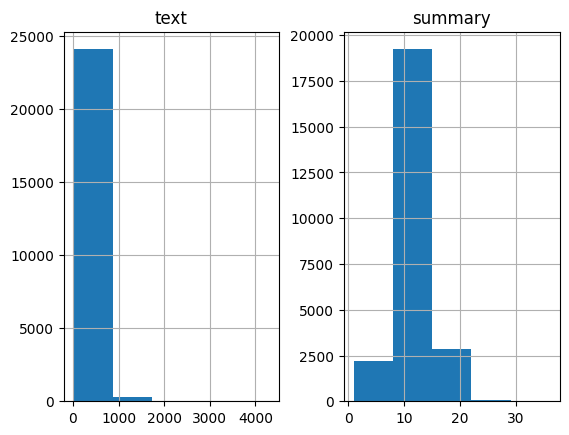

In [ ]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
# plt.xlim(0, 1000)
plt.show()

**Max length Selection**

In [ ]:
# checking how much % of summary has word count from 0-20

cnt=0
for i in pre['summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(pre['summary'])*100, "%")

92.65098329022457 %


In [ ]:
#Checking how much % of text have 0-500 words

cnt=0
for i in pre['text']:
    if(len(i.split())<=300):
        cnt=cnt+1
print(cnt/len(pre['text'])*100, "%")

81.78347087079689 %


In [ ]:
max_text_len=300
max_summary_len=15

In [ ]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['text'])
cleaned_summary=np.array(pre['summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append('sostok '+'_START_ '+cleaned_summary[i]+' _END_'+' eostok')

post_pre=pd.DataFrame({'summary':short_summary,'text':short_text})
len(post_pre)

18541

In [ ]:
post_pre.head(2)

,summary,text
0,sostok _START_ কাৰাবন্দীৰ পৰা গৃহবন্দী হৈ উভতি...,আং ছান ছু কীফাইল ফটোসংগ্ৰহীতকাৰাগাৰৰ সূত্ৰই জন...
1,sostok _START_ চীন কোৰিয়া ইণ্ডোনেছিয়াৰ পৰা আ...,ফটোসংগ্ৰহীতসস্তীয়া আমদানিৰ পৰা ঘৰুৱা উদ্যোগক ...


# **MODEL BUILDING Pre-requisite**

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.2,random_state=0,shuffle=True)

In [ ]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also

from tensorflow.keras.preprocessing.text import Tokenizer #it gives each word a token that the machine can understand
from tensorflow.keras.preprocessing.sequence import pad_sequences #it makes all the variable length of same sequence, because models take input as a fixed length

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
#Words falling lower than 4 will be considered rare
thresh=2

cnt=0
tot_cnt=0
freq=0
tot_freq=0

#it processess the whole dataset and gives the dictionary (not for particular row)

for key,value in x_tokenizer.word_counts.items():  # the .items() will return the dictionary word and its frequency [('apple',150)]
    # total unique words in the entire dataset [('apple',150),('banana',300)] -> here it is 2 as 'apple' and 'banana'
    tot_cnt=tot_cnt+1
    # total words in the entire dataset i.e., 150+300+....
    tot_freq=tot_freq+value
    if(value<thresh):
        # total unique rare words in the entire dataset
        cnt=cnt+1
        # occurence of rare words in the entire dataset
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100, "%")
print("Total Coverage of rare words:",(freq/tot_freq)*100, "%")

% of rare words in vocabulary: 66.00210639927582 %
Total Coverage of rare words: 5.108000683056199 %


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) # tot_cnt-cnt -> will consider the most common words and ignores the rare words based on unique words(Cause rare words can lead to overfitting of data)
x_tokenizer.fit_on_texts(list(x_tr))           # the num words does this frequency task internally

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr)
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post') # maxlen -> if it is short than made to the maxlen , if long than truncated to maxlen
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post') # post -> padding is added to the end (pre -> padding added at start)

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 78120


In [ ]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
thresh=2

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100, "%")
print("Total Coverage of rare words:",(freq/tot_freq)*100, "%")

% of rare words in vocabulary: 57.8811282740094 %
Total Coverage of rare words: 7.8858638216496395 %


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 12544


In [ ]:
# seperating the summary that is empty
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):         # if the summary has count 2 i.e., only START & END is present -> empty
        ind.append(i)   # keeping record of the particular empty index in a column of ytrain

y_tr=np.delete(y_tr,ind, axis=0) # removing empty rows from x_train and y_train using ind (index list), axis = 0 means rows
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
# doing same for test / validation data

ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
x_vocab_size = len(x_tokenizer.word_index) + 1
y_vocab_size = len(y_tokenizer.word_index) + 1
print(x_vocab_size)
print(y_vocab_size)

229777
29781


In [ ]:
# Create the embedding matrix using the FastText model for encoder
ft_embedding_matrix_encoder = np.empty((x_voc, ft_model.get_dimension()))
i1=0
i2=0
for word, idx in x_tokenizer.word_index.items():
    if word in ft_model.words:
        ft_embedding_matrix_encoder[i1] = ft_model[word]
        i1+=1
    if i1 == (x_voc-1):
      break


# Create the embedding matrix using the FastText model for decoder
ft_embedding_matrix_decoder = np.empty((y_voc, ft_model.get_dimension()))
for word, idx in y_tokenizer.word_index.items():
    if word in ft_model.words:
        ft_embedding_matrix_decoder[i2] = ft_model[word]
        i2+=1
    if i2 == (y_voc -1):
      break

# **CuDNNLSTM -> No FastText**

In [ ]:
from keras import backend as K
from numpy import *
import numpy as np
import pandas as pd
from keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
from keras.layers import CuDNNLSTM
K.clear_session()

# Assuming FastText was trained with an embedding dimension of 300
embedding_dim = 200
latent_dim=300
max_text_len=300

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

# Embedding layer with FastText embeddings for the encoder
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)

# Encoder LSTM layers (you can customize the number of layers and other parameters)
encoder_lstm1 = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

encoder_lstm2 = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = CuDNNLSTM(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)


# Decoder
decoder_inputs = Input(shape=(None,))

# Embedding layer with FastText embeddings for the decoder
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM layers (you can customize the number of layers and other parameters)
decoder_lstm = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, decoder_fwd_state, decoder_back_state  = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 200)     15624000    ['input_1[0][0]']                
                                                                                                  
 cu_dnnlstm (CuDNNLSTM)         [(None, 300, 300),   602400      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')


In [ ]:
# we remove the last word [:,:-1] & the first word [:,1:] so that the model can predict the next one
#reshape is done because the decoder expects a 3d tensor
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,batch_size=128,verbose=1, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

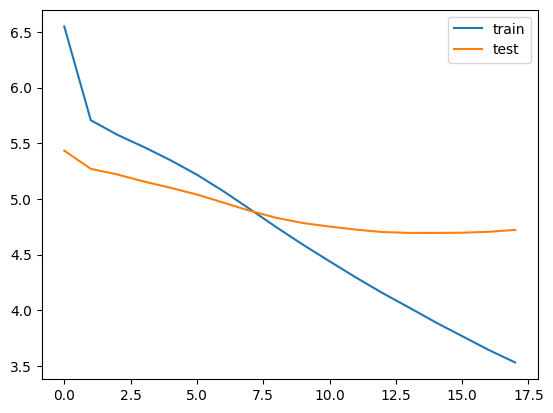

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq, verbose=0)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c], verbose=0)
         # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token
         # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: প্ৰতিনিধিত্বমূলক চিত্ৰ চলিত বছৰৰ অহা ২১ অক্টোবৰত বৰ্ষাপাৰা ক্ৰিকেট ষ্টেডিয়ামত প্ৰথমবাৰৰ বাবে অনুষ্ঠিত হব আন্তঃৰাষ্ট্ৰীয় দিবানৈশ এদিনীয়া ক্ৰিকেট মেচঅসমবাসীৰ বাবে বহু প্ৰতিক্ষিত এই এদিনীয়া মেচখন অনুষ্ঠিত হব ভাৰত আৰু ৱেষ্ট ইণ্ডিজৰ বাবে অধীৰ আগ্ৰহেৰে ৰৈ আছে গুৱাহাটীৰ ক্ৰিকেট এই এদিনীয়া মেচখনৰ বাবে বৰ্ষাপাৰা ষ্টেডিয়ামত চলি থকা কামকাজৰ অগ্ৰগতিৰ বুজ লোৱাৰ উদ্দেশ্যে মঙলবাৰে জিলা প্ৰশাসন আৰু অসম ক্ৰিকেট সন্থাৰ মাজত এখন গুৰুত্বপূৰ্ণ বৈঠক অনুষ্ঠিত হয়কামৰূপ মেট্ৰো জিলাৰ উপায়ুক্ত বীৰেন্দ্ৰ মিট্টালৰ সভাপতিত্বত অনুষ্ঠিত এই বৈঠকত বৰ্ষাপাৰা ক্ৰিকেট ষ্টেডিয়ামৰ ভিতৰেবাহিৰে চলি থকা আন্তঃগাঁথনিৰ উন্নয়নমূলক কামকাজৰ অগ্ৰগতি সন্দৰ্ভত আলোচনা কৰেকালিৰ এই সভাখন অনুষ্ঠিত হয় উপায়ুক্তৰ কাৰ্যালয়ৰ কালত উপায়ুক্তগৰাকীয়ে গড়কাপ্তানী বিদ্যুৎ বিভাগ আৰু জি এম চিক অহা ৩০ ছেপ্তেম্বৰৰ ভিতৰত ষ্টেডিয়ামৰ আশে পাশে থকা পথ নলানৰ্দমাৰ লগতে বিদ্যুতৰ ব্যৱস্থা কৰি দিবলৈ আহ্বান জনায়তেওঁ ষ্টেডিয়ামৰ লগতে দৰ্শকৰ সুৰক্ষা তথা অন্যান্য সম্পৰ্কতো এচিএৰ বিষয়ববীয়াৰ লগত বিভিন্ন আলোচনা কৰেউল্লেখ্য যে ইতিমধ্যে ভাৰতৱেষ্ট ইণ্ডিজৰ মাজত অনুষ্ঠিত

# **CuDNN LSTM**

In [ ]:
from keras import backend as K
from numpy import *
import numpy as np
import pandas as pd
from keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
from keras.layers import CuDNNLSTM
K.clear_session()

# Assuming FastText was trained with an embedding dimension of 300
embedding_dim = 300
latent_dim=300
max_text_len=300

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

# Embedding layer with FastText embeddings for the encoder
enc_emb = Embedding(x_voc, embedding_dim, weights=[ft_embedding_matrix_encoder], trainable=True)(encoder_inputs)

# Encoder LSTM layers (you can customize the number of layers and other parameters)
encoder_lstm1 = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

encoder_lstm2 = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = CuDNNLSTM(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)


# Decoder
decoder_inputs = Input(shape=(None,))

# Embedding layer with FastText embeddings for the decoder
dec_emb_layer = Embedding(y_voc, embedding_dim, weights=[ft_embedding_matrix_decoder], trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM layers (you can customize the number of layers and other parameters)
decoder_lstm = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, decoder_fwd_state, decoder_back_state  = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     23436000    ['input_1[0][0]']                
                                                                                                  
 cu_dnnlstm (CuDNNLSTM)         [(None, 300, 300),   722400      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
# we remove the last word [:,:-1] & the first word [:,1:] so that the model can predict the next one
#reshape is done because the decoder expects a 3d tensor
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128,verbose=1, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
116/116 [==============================] - 66s 508ms/step - loss: 6.4987 - val_loss: 5.4168
Epoch 2/50
116/116 [==============================] - 46s 397ms/step - loss: 5.6951 - val_loss: 5.2623
Epoch 3/50
116/116 [==============================] - 42s 364ms/step - loss: 5.5585 - val_loss: 5.2007
Epoch 4/50
116/116 [==============================] - 40s 346ms/step - loss: 5.4427 - val_loss: 5.1399
Epoch 5/50
116/116 [==============================] - 40s 342ms/step - loss: 5.3081 - val_loss: 5.0676
Epoch 6/50
116/116 [==============================] - 36s 314ms/step - loss: 5.1524 - val_loss: 4.9849
Epoch 7/50
116/116 [==============================] - 35s 303ms/step - loss: 4.9815 - val_loss: 4.9034
Epoch 8/50
116/116 [==============================] - 35s 306ms/step - loss: 4.8014 - val_loss: 4.8287
Epoch 9/50
116/116 [==============================] - 34s 292ms/step - loss: 4.6195 - val_loss: 4.7708
Epoch 10/50
116/116 [==============================] - 33s 289ms/step - l

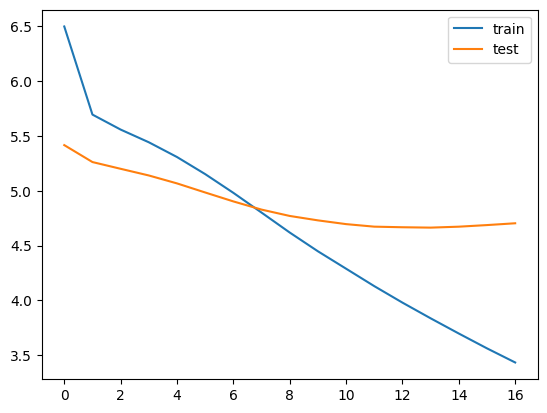

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')     # calculates the loss decresing for each epoch
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word   # from token integer to word -> for y(training summary)
reverse_source_word_index=x_tokenizer.index_word   # from token integer to word -> for x(training text)
target_word_index=y_tokenizer.word_index   # from word to token integer -> for y(training summary)

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq, verbose=0)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c], verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
max_text_len=300
max_summary_len=15

In [ ]:
for i in range(0,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: প্ৰতিনিধিত্বমূলক চিত্ৰ চলিত বছৰৰ অহা ২১ অক্টোবৰত বৰ্ষাপাৰা ক্ৰিকেট ষ্টেডিয়ামত প্ৰথমবাৰৰ বাবে অনুষ্ঠিত হব আন্তঃৰাষ্ট্ৰীয় দিবানৈশ এদিনীয়া ক্ৰিকেট মেচঅসমবাসীৰ বাবে বহু প্ৰতিক্ষিত এই এদিনীয়া মেচখন অনুষ্ঠিত হব ভাৰত আৰু ৱেষ্ট ইণ্ডিজৰ বাবে অধীৰ আগ্ৰহেৰে ৰৈ আছে গুৱাহাটীৰ ক্ৰিকেট এই এদিনীয়া মেচখনৰ বাবে বৰ্ষাপাৰা ষ্টেডিয়ামত চলি থকা কামকাজৰ অগ্ৰগতিৰ বুজ লোৱাৰ উদ্দেশ্যে মঙলবাৰে জিলা প্ৰশাসন আৰু অসম ক্ৰিকেট সন্থাৰ মাজত এখন গুৰুত্বপূৰ্ণ বৈঠক অনুষ্ঠিত হয়কামৰূপ মেট্ৰো জিলাৰ উপায়ুক্ত বীৰেন্দ্ৰ মিট্টালৰ সভাপতিত্বত অনুষ্ঠিত এই বৈঠকত বৰ্ষাপাৰা ক্ৰিকেট ষ্টেডিয়ামৰ ভিতৰেবাহিৰে চলি থকা আন্তঃগাঁথনিৰ উন্নয়নমূলক কামকাজৰ অগ্ৰগতি সন্দৰ্ভত আলোচনা কৰেকালিৰ এই সভাখন অনুষ্ঠিত হয় উপায়ুক্তৰ কাৰ্যালয়ৰ কালত উপায়ুক্তগৰাকীয়ে গড়কাপ্তানী বিদ্যুৎ বিভাগ আৰু জি এম চিক অহা ৩০ ছেপ্তেম্বৰৰ ভিতৰত ষ্টেডিয়ামৰ আশে পাশে থকা পথ নলানৰ্দমাৰ লগতে বিদ্যুতৰ ব্যৱস্থা কৰি দিবলৈ আহ্বান জনায়তেওঁ ষ্টেডিয়ামৰ লগতে দৰ্শকৰ সুৰক্ষা তথা অন্যান্য সম্পৰ্কতো এচিএৰ বিষয়ববীয়াৰ লগত বিভিন্ন আলোচনা কৰেউল্লেখ্য যে ইতিমধ্যে ভাৰতৱেষ্ট ইণ্ডিজৰ মাজত অনুষ্ঠিত

# **Bi-LSTM**

In [ ]:
from keras.layers import Input, Embedding, Bidirectional, LSTM, RepeatVector, Concatenate, Dense, TimeDistributed
from keras.layers import CuDNNLSTM
from keras.layers import Attention, Concatenate
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K # keras -> main deep learning library,   backend -> tenseflow or others
from numpy import *
import numpy as np
from tensorflow.keras.models import Model   # helps to make custom architecture by defining input & output
from tensorflow.keras.callbacks import EarlyStopping   # callback function that stops working if the monitored metric stops improving
import warnings   # control the warning msgs
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")


# Input lengths
max_text_len = 300
latent_dim = 300    # no. of memory cells / units in the LSTM
embedding_dim=300

# Encoder
encoder_inputs = Input(shape=(max_text_len,))
enc_emb = Embedding(x_voc, embedding_dim, weights=[ft_embedding_matrix_encoder], trainable=True)(encoder_inputs)

# Encoder Layer
encoder_bilstm_1 = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output1, forward_h1, forward_c1= encoder_bilstm_1(enc_emb)

encoder_bilstm_2 = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output2, forward_h2, forward_c2= encoder_bilstm_2(encoder_output1)

encoder_bilstm = Bidirectional(CuDNNLSTM(latent_dim, return_sequences=True, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_bilstm(encoder_output2)

# Concatenate the forward and backward states
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

# Decoder
decoder_inputs = Input(shape=(None,))
dec_emb = Embedding(input_dim=y_voc, output_dim=embedding_dim, weights=[ft_embedding_matrix_decoder], trainable=True)(decoder_inputs)

decoder_lstm = CuDNNLSTM(latent_dim*2, return_sequences=True, return_state=True)  # BiLSTM with concatenated states
decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c])


# # Attention mechanism
# attention = Attention(name='attention_layer')([encoder_outputs, decoder_outputs])
# decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attention])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, 300)]        0           []                               
                                                                                                  
 embedding_27 (Embedding)       (None, 300, 300)     23436000    ['input_43[0][0]']               
                                                                                                  
 cu_dnnlstm_24 (CuDNNLSTM)      [(None, 300, 300),   722400      ['embedding_27[0][0]']           
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                            

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
# we remove the last word [:,:-1] & the first word [:,1:] so that the model can predict the next one
#reshape is done because the decoder expects a 3d tensor
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128,verbose=1, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

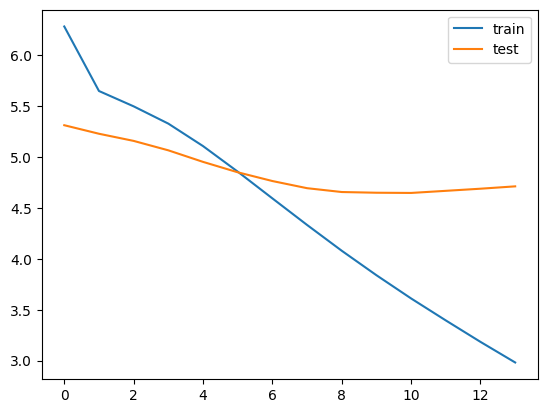

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')     # calculates the loss decresing for each epoch
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word   # from token integer to word -> for y(training summary)
reverse_source_word_index=x_tokenizer.index_word   # from token integer to word -> for x(training text)
target_word_index=y_tokenizer.word_index   # from word to token integer -> for y(training summary)

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, forward_h, forward_c, backward_h, backward_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim*2,))
decoder_state_input_c = Input(shape=(latent_dim*2,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))


# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2]
)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, forward_h, forward_c, backward_h, backward_c = encoder_model.predict(input_seq,verbose=0)

    e_h = Concatenate()([forward_h, backward_h])
    e_c = Concatenate()([forward_c, backward_c])

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_h, e_c],verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

**Integer to Word**

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
max_text_len=300
max_summary_len=15

**Testing**

In [ ]:
for i in range(0,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: প্ৰতিনিধিত্বমূলক চিত্ৰ চলিত বছৰৰ অহা ২১ অক্টোবৰত বৰ্ষাপাৰা ক্ৰিকেট ষ্টেডিয়ামত প্ৰথমবাৰৰ বাবে অনুষ্ঠিত হব আন্তঃৰাষ্ট্ৰীয় দিবানৈশ এদিনীয়া ক্ৰিকেট মেচঅসমবাসীৰ বাবে বহু প্ৰতিক্ষিত এই এদিনীয়া মেচখন অনুষ্ঠিত হব ভাৰত আৰু ৱেষ্ট ইণ্ডিজৰ বাবে অধীৰ আগ্ৰহেৰে ৰৈ আছে গুৱাহাটীৰ ক্ৰিকেট এই এদিনীয়া মেচখনৰ বাবে বৰ্ষাপাৰা ষ্টেডিয়ামত চলি থকা কামকাজৰ অগ্ৰগতিৰ বুজ লোৱাৰ উদ্দেশ্যে মঙলবাৰে জিলা প্ৰশাসন আৰু অসম ক্ৰিকেট সন্থাৰ মাজত এখন গুৰুত্বপূৰ্ণ বৈঠক অনুষ্ঠিত হয়কামৰূপ মেট্ৰো জিলাৰ উপায়ুক্ত বীৰেন্দ্ৰ মিট্টালৰ সভাপতিত্বত অনুষ্ঠিত এই বৈঠকত বৰ্ষাপাৰা ক্ৰিকেট ষ্টেডিয়ামৰ ভিতৰেবাহিৰে চলি থকা আন্তঃগাঁথনিৰ উন্নয়নমূলক কামকাজৰ অগ্ৰগতি সন্দৰ্ভত আলোচনা কৰেকালিৰ এই সভাখন অনুষ্ঠিত হয় উপায়ুক্তৰ কাৰ্যালয়ৰ কালত উপায়ুক্তগৰাকীয়ে গড়কাপ্তানী বিদ্যুৎ বিভাগ আৰু জি এম চিক অহা ৩০ ছেপ্তেম্বৰৰ ভিতৰত ষ্টেডিয়ামৰ আশে পাশে থকা পথ নলানৰ্দমাৰ লগতে বিদ্যুতৰ ব্যৱস্থা কৰি দিবলৈ আহ্বান জনায়তেওঁ ষ্টেডিয়ামৰ লগতে দৰ্শকৰ সুৰক্ষা তথা অন্যান্য সম্পৰ্কতো এচিএৰ বিষয়ববীয়াৰ লগত বিভিন্ন আলোচনা কৰেউল্লেখ্য যে ইতিমধ্যে ভাৰতৱেষ্ট ইণ্ডিজৰ মাজত অনুষ্ঠিত

# **GRU**

In [ ]:
from tensorflow.keras import backend as K
from numpy import *
import numpy as np
import pandas as pd
from keras.layers import Input, GRU, Embedding, Dense, TimeDistributed
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
from keras.layers import CuDNNGRU
K.clear_session()

# Assuming FastText was trained with an embedding dimension of 300
embedding_dim = 300
latent_dim = 300
max_text_len = 300

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

# Embedding layer with FastText embeddings for the encoder
enc_emb = Embedding(x_voc, embedding_dim, weights=[ft_embedding_matrix_encoder], trainable=True)(encoder_inputs)

# Encoder GRU layers
encoder_gru1 = CuDNNGRU(latent_dim, return_sequences=True, return_state=True)
encoder_output1, state_h1 = encoder_gru1(enc_emb)

encoder_gru2 = CuDNNGRU(latent_dim, return_sequences=True, return_state=True)
encoder_output2, state_h2 = encoder_gru2(encoder_output1)

encoder_gru3 = CuDNNGRU(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h = encoder_gru3(encoder_output2)

# Decoder
decoder_inputs = Input(shape=(None,))

# Embedding layer with FastText embeddings for the decoder
dec_emb_layer = Embedding(y_voc, embedding_dim, weights=[ft_embedding_matrix_decoder], trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder GRU layers
decoder_gru = CuDNNGRU(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, decoder_state = decoder_gru(dec_emb, initial_state=state_h)

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     23436000    ['input_1[0][0]']                
                                                                                                  
 cu_dnngru (CuDNNGRU)           [(None, 300, 300),   541800      ['embedding[0][0]']              
                                 (None, 300)]                                                     
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                           

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
# we remove the last word [:,:-1] & the first word [:,1:] so that the model can predict the next one
#reshape is done because the decoder expects a 3d tensor
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128,verbose=1, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
116/116 [==============================] - 51s 398ms/step - loss: 6.5908 - val_loss: 5.4026
Epoch 2/50
116/116 [==============================] - 38s 324ms/step - loss: 5.6802 - val_loss: 5.2254
Epoch 3/50
116/116 [==============================] - 36s 309ms/step - loss: 5.4631 - val_loss: 5.0852
Epoch 4/50
116/116 [==============================] - 36s 307ms/step - loss: 5.2229 - val_loss: 4.9479
Epoch 5/50
116/116 [==============================] - 32s 274ms/step - loss: 4.9668 - val_loss: 4.8302
Epoch 6/50
116/116 [==============================] - 65s 562ms/step - loss: 4.7690 - val_loss: 5.4341
Epoch 7/50
116/116 [==============================] - 117s 1s/step - loss: 4.5484 - val_loss: 4.6929
Epoch 8/50
116/116 [==============================] - 31s 265ms/step - loss: 4.2500 - val_loss: 4.6531
Epoch 9/50
116/116 [==============================] - 31s 263ms/step - loss: 4.0248 - val_loss: 4.6463
Epoch 10/50
116/116 [==============================] - 30s 256ms/step - los

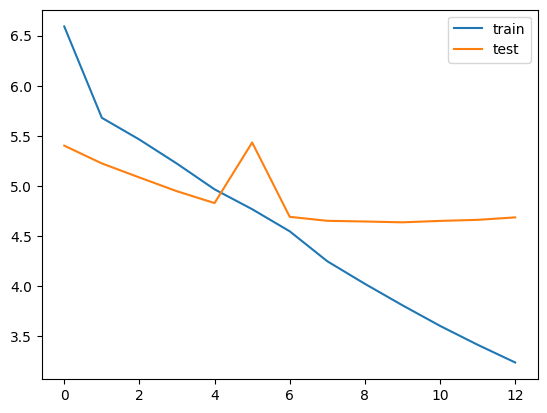

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')     # calculates the loss decresing for each epoch
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word   # from token integer to word -> for y(training summary)
reverse_source_word_index=x_tokenizer.index_word   # from token integer to word -> for x(training text)
target_word_index=y_tokenizer.word_index   # from word to token integer -> for y(training summary)

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))


# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2= decoder_gru(dec_emb, initial_state=[decoder_state_input_h])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_state_input_h],
    [decoder_outputs2] + [state_h2]
)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h= encoder_model.predict(input_seq,verbose=0)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h = decoder_model.predict([target_seq] + [e_h],verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h = h

    return decoded_sentence


In [ ]:
# Not directly related to model prediction ('decoded_sequence') but can be used seperately

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):   # padding token i.e., 0 is ignored
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
max_text_len=300
max_summary_len=15

In [ ]:
for i in range(0,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))    # reshaped in to token of 2d array OR 1d array as it has only 1 column
    print("\n")

Review: প্ৰতিনিধিত্বমূলক চিত্ৰ চলিত বছৰৰ অহা ২১ অক্টোবৰত বৰ্ষাপাৰা ক্ৰিকেট ষ্টেডিয়ামত প্ৰথমবাৰৰ বাবে অনুষ্ঠিত হব আন্তঃৰাষ্ট্ৰীয় দিবানৈশ এদিনীয়া ক্ৰিকেট মেচঅসমবাসীৰ বাবে বহু প্ৰতিক্ষিত এই এদিনীয়া মেচখন অনুষ্ঠিত হব ভাৰত আৰু ৱেষ্ট ইণ্ডিজৰ বাবে অধীৰ আগ্ৰহেৰে ৰৈ আছে গুৱাহাটীৰ ক্ৰিকেট এই এদিনীয়া মেচখনৰ বাবে বৰ্ষাপাৰা ষ্টেডিয়ামত চলি থকা কামকাজৰ অগ্ৰগতিৰ বুজ লোৱাৰ উদ্দেশ্যে মঙলবাৰে জিলা প্ৰশাসন আৰু অসম ক্ৰিকেট সন্থাৰ মাজত এখন গুৰুত্বপূৰ্ণ বৈঠক অনুষ্ঠিত হয়কামৰূপ মেট্ৰো জিলাৰ উপায়ুক্ত বীৰেন্দ্ৰ মিট্টালৰ সভাপতিত্বত অনুষ্ঠিত এই বৈঠকত বৰ্ষাপাৰা ক্ৰিকেট ষ্টেডিয়ামৰ ভিতৰেবাহিৰে চলি থকা আন্তঃগাঁথনিৰ উন্নয়নমূলক কামকাজৰ অগ্ৰগতি সন্দৰ্ভত আলোচনা কৰেকালিৰ এই সভাখন অনুষ্ঠিত হয় উপায়ুক্তৰ কাৰ্যালয়ৰ কালত উপায়ুক্তগৰাকীয়ে গড়কাপ্তানী বিদ্যুৎ বিভাগ আৰু জি এম চিক অহা ৩০ ছেপ্তেম্বৰৰ ভিতৰত ষ্টেডিয়ামৰ আশে পাশে থকা পথ নলানৰ্দমাৰ লগতে বিদ্যুতৰ ব্যৱস্থা কৰি দিবলৈ আহ্বান জনায়তেওঁ ষ্টেডিয়ামৰ লগতে দৰ্শকৰ সুৰক্ষা তথা অন্যান্য সম্পৰ্কতো এচিএৰ বিষয়ববীয়াৰ লগত বিভিন্ন আলোচনা কৰেউল্লেখ্য যে ইতিমধ্যে ভাৰতৱেষ্ট ইণ্ডিজৰ মাজত অনুষ্ঠিত

# **Bi-LSTM   GRU**

In [ ]:
from keras.layers import Input, Embedding, Bidirectional, LSTM, RepeatVector, Concatenate, Dense, TimeDistributed
from keras.layers import CuDNNLSTM
from keras.layers import Attention, Concatenate
from keras.optimizers import Adam
from tensorflow.keras import backend as K # keras -> main deep learning library,   backend -> tenseflow or others
from numpy import *
import numpy as np
from tensorflow.keras.models import Model   # helps to make custom architecture by defining input & output
from tensorflow.keras.callbacks import EarlyStopping   # callback function that stops working if the monitored metric stops improving
import warnings   # control the warning msgs
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

K.clear_session()

# Input lengths
max_text_len = 300
latent_dim = 300    # no. of memory cells / units in the LSTM
embedding_dim=300

# Encoder
encoder_inputs = Input(shape=(max_text_len,))
enc_emb = Embedding(x_voc, embedding_dim, weights=[ft_embedding_matrix_encoder], trainable=True)(encoder_inputs)

# Encoder Layer Bi-LSTM
encoder_bilstm_1 = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output1, forward_h1, forward_c1= encoder_bilstm_1(enc_emb)

encoder_bilstm_2 = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output2, forward_h2, forward_c2= encoder_bilstm_2(encoder_output1)

encoder_bilstm = Bidirectional(CuDNNLSTM(latent_dim, return_sequences=True, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_bilstm(encoder_output2)

# Concatenate the forward and backward states
state_h = Concatenate()([forward_h, backward_h])

# Decoder GRU
decoder_inputs = Input(shape=(None,))
dec_emb = Embedding(y_voc, embedding_dim, weights=[ft_embedding_matrix_decoder], trainable=True)(decoder_inputs)

decoder_gru = CuDNNGRU(latent_dim*2, return_sequences=True, return_state=True)  # BiLSTM with concatenated states
decoder_outputs, decoder_state = decoder_gru(dec_emb, initial_state=state_h)


# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)


# Define the model
model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     23436000    ['input_1[0][0]']                
                                                                                                  
 cu_dnnlstm (CuDNNLSTM)         [(None, 300, 300),   722400      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
# we remove the last word [:,:-1] & the first word [:,1:] so that the model can predict the next one
#reshape is done because the decoder expects a 3d tensor
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128,verbose=1, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
116/116 [==============================] - 76s 591ms/step - loss: 6.3858 - val_loss: 5.3781
Epoch 2/50
116/116 [==============================] - 57s 491ms/step - loss: 5.6266 - val_loss: 5.1415
Epoch 3/50
116/116 [==============================] - 52s 450ms/step - loss: 5.3046 - val_loss: 4.9411
Epoch 4/50
116/116 [==============================] - 52s 447ms/step - loss: 4.9752 - val_loss: 4.8171
Epoch 5/50
116/116 [==============================] - 47s 408ms/step - loss: 4.6469 - val_loss: 4.7417
Epoch 6/50
116/116 [==============================] - 48s 410ms/step - loss: 4.3191 - val_loss: 4.6869
Epoch 7/50
116/116 [==============================] - 45s 391ms/step - loss: 3.9751 - val_loss: 4.6490
Epoch 8/50
116/116 [==============================] - 44s 382ms/step - loss: 3.6120 - val_loss: 4.6595
Epoch 9/50
116/116 [==============================] - 48s 412ms/step - loss: 3.2581 - val_loss: 4.6891
Epoch 10/50
116/116 [==============================] - 44s 374ms/step - l

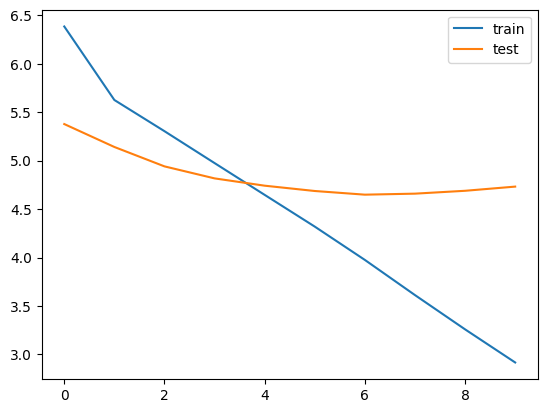

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')     # calculates the loss decresing for each epoch
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word   # from token integer to word -> for y(training summary)
reverse_source_word_index=x_tokenizer.index_word   # from token integer to word -> for x(training text)
target_word_index=y_tokenizer.word_index   # from word to token integer -> for y(training summary)

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim*2,))


# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2= decoder_gru(dec_emb, initial_state=[decoder_state_input_h])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_state_input_h],
    [decoder_outputs2] + [state_h2]
)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h= encoder_model.predict(input_seq,verbose=0)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h = decoder_model.predict([target_seq] + [e_h],verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h = h

    return decoded_sentence


In [ ]:
# Not directly related to model prediction ('decoded_sequence') but can be used seperately

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):   # padding token i.e., 0 is ignored
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
max_text_len=300
max_summary_len=15

In [ ]:
for i in range(0,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))    # reshaped in to token of 2d array OR 1d array as it has only 1 column
    print("\n")

Review: প্ৰতিনিধিত্বমূলক চিত্ৰ চলিত বছৰৰ অহা ২১ অক্টোবৰত বৰ্ষাপাৰা ক্ৰিকেট ষ্টেডিয়ামত প্ৰথমবাৰৰ বাবে অনুষ্ঠিত হব আন্তঃৰাষ্ট্ৰীয় দিবানৈশ এদিনীয়া ক্ৰিকেট মেচঅসমবাসীৰ বাবে বহু প্ৰতিক্ষিত এই এদিনীয়া মেচখন অনুষ্ঠিত হব ভাৰত আৰু ৱেষ্ট ইণ্ডিজৰ বাবে অধীৰ আগ্ৰহেৰে ৰৈ আছে গুৱাহাটীৰ ক্ৰিকেট এই এদিনীয়া মেচখনৰ বাবে বৰ্ষাপাৰা ষ্টেডিয়ামত চলি থকা কামকাজৰ অগ্ৰগতিৰ বুজ লোৱাৰ উদ্দেশ্যে মঙলবাৰে জিলা প্ৰশাসন আৰু অসম ক্ৰিকেট সন্থাৰ মাজত এখন গুৰুত্বপূৰ্ণ বৈঠক অনুষ্ঠিত হয়কামৰূপ মেট্ৰো জিলাৰ উপায়ুক্ত বীৰেন্দ্ৰ মিট্টালৰ সভাপতিত্বত অনুষ্ঠিত এই বৈঠকত বৰ্ষাপাৰা ক্ৰিকেট ষ্টেডিয়ামৰ ভিতৰেবাহিৰে চলি থকা আন্তঃগাঁথনিৰ উন্নয়নমূলক কামকাজৰ অগ্ৰগতি সন্দৰ্ভত আলোচনা কৰেকালিৰ এই সভাখন অনুষ্ঠিত হয় উপায়ুক্তৰ কাৰ্যালয়ৰ কালত উপায়ুক্তগৰাকীয়ে গড়কাপ্তানী বিদ্যুৎ বিভাগ আৰু জি এম চিক অহা ৩০ ছেপ্তেম্বৰৰ ভিতৰত ষ্টেডিয়ামৰ আশে পাশে থকা পথ নলানৰ্দমাৰ লগতে বিদ্যুতৰ ব্যৱস্থা কৰি দিবলৈ আহ্বান জনায়তেওঁ ষ্টেডিয়ামৰ লগতে দৰ্শকৰ সুৰক্ষা তথা অন্যান্য সম্পৰ্কতো এচিএৰ বিষয়ববীয়াৰ লগত বিভিন্ন আলোচনা কৰেউল্লেখ্য যে ইতিমধ্যে ভাৰতৱেষ্ট ইণ্ডিজৰ মাজত অনুষ্ঠিত

# **CALCULATING SCORE**

In [ ]:
!pip install rouge
!pip install rouge-score
!pip install evaluate

In [ ]:
from rouge import Rouge
from tqdm import tqdm
rouge=Rouge()

Rough_f=[]
Rough_p=[]
Rough_r=[]

for i in tqdm(range(1000), desc="Calculating ROUGE scores"):
    # Calculate ROUGE scores using rouge library
    scores = rouge.get_scores(decode_sequence(x_tr[i].reshape(1, max_text_len)), seq2summary(y_tr[i]))
    Rough_f.append(scores[0]['rouge-1']['f'])
    Rough_p.append(scores[0]['rouge-1']['p'])
    Rough_r.append(scores[0]['rouge-1']['r'])

print("\nRough:\n\t1. F:", sum(Rough_f)/len(Rough_f),"\n\t2. P:",sum(Rough_p)/len(Rough_p),"\n\t2. R:",sum(Rough_r)/len(Rough_r))

Calculating ROUGE scores: 100%|██████████| 1000/1000 [14:31<00:00,  1.15it/s]


Rough:
	1. F: 0.19085394385429588 
	2. P: 0.19813636363636364 
	2. R: 0.1885647297147297


In [ ]:
from rouge_score import rouge_scorer
from tqdm import tqdm

# Initialize the scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rouge3', 'rougeL'])

# Initialize variables to store cumulative scores
total_scores = {'rouge1': {'precision': 0, 'recall': 0, 'fmeasure': 0},
                'rouge2': {'precision': 0, 'recall': 0, 'fmeasure': 0},
                'rouge3': {'precision': 0, 'recall': 0, 'fmeasure': 0},
                'rougeL': {'precision': 0, 'recall': 0, 'fmeasure': 0}}

num_samples = len(y_tr)

# Use tqdm to create a progress bar
for i in tqdm(range(1000), desc="Calculating ROUGE scores"):
    y_or = seq2summary(y_tr[i])
    y_pred = decode_sequence(x_tr[i].reshape(1, max_text_len))
    scores = scorer.score(y_or, y_pred)

    for key in scores:
        total_scores[key]['precision'] += scores[key].precision
        total_scores[key]['recall'] += scores[key].recall
        total_scores[key]['fmeasure'] += scores[key].fmeasure

# Calculate averages
average_scores = {}
for key in total_scores:
    average_scores[key] = {
        'precision': total_scores[key]['precision'] / num_samples,
        'recall': total_scores[key]['recall'] / num_samples,
        'fmeasure': total_scores[key]['fmeasure'] / num_samples
    }

# Print average scores
for key in average_scores:
    print(f'{key}: Precision={average_scores[key]["precision"]:.4f}, Recall={average_scores[key]["recall"]:.4f}, F1-score={average_scores[key]["fmeasure"]:.4f}')


# **PICKLE**

## **VALUES**

In [ ]:
# import pickle
# object_dict ={
#     'x_voc':x_voc,
#     'y_voc':y_voc,
#     'x_tr':x_tr,
#     'y_tr':y_tr,
#     'x_val':x_val,
#     'y_val':y_val,
#     'ft_embedding_matrix_encoder':ft_embedding_matrix_encoder,
#     'ft_embedding_matrix_decoder':ft_embedding_matrix_decoder,
#     'x_tokenizer':x_tokenizer,
#     'y_tokenizer':y_tokenizer
# }

# pickle.dump(object_dict, open("/content/drive/My Drive/values_store_bi.pkl", 'wb'))

In [ ]:
import pickle
dict_load = pickle.load(open("/content/drive/MyDrive/values_store_bi.pkl", 'rb'))
x_voc=dict_load['x_voc']
y_voc=dict_load['y_voc']
x_tr=dict_load['x_tr']
y_tr=dict_load['y_tr']
x_val=dict_load['x_val']
y_val=dict_load['y_val']
ft_embedding_matrix_encoder=dict_load['ft_embedding_matrix_encoder']
ft_embedding_matrix_decoder=dict_load['ft_embedding_matrix_decoder']
x_tokenizer=dict_load['x_tokenizer']
y_tokenizer=dict_load['y_tokenizer']

## **LSTM no fastText**

In [ ]:
import tensorflow as tf
model.save_weights("/content/drive/My Drive/model_weights_lstm_nft.h5")

In [ ]:
import tensorflow as tf
model.load_weights("/content/drive/My Drive/model_weights_lstm_nft.h5")

## **LSTM**

In [ ]:
import tensorflow as tf
model.save_weights("/content/drive/My Drive/model_weights_lstm.h5")

In [ ]:
import tensorflow as tf
model.load_weights("/content/drive/My Drive/model_weights_lstm.h5")

## **Bi-LSTM**

In [ ]:
# import tensorflow as tf
# model.save_weights("/content/drive/My Drive/model_weights_bi.h5")

In [ ]:
import tensorflow as tf
model.load_weights("/content/drive/My Drive/model_weights_bi.h5")

## **GRU**

In [ ]:
import tensorflow as tf
model.save_weights("/content/drive/My Drive/model_weights_gru.h5")

In [ ]:
import tensorflow as tf
model.load_weights("/content/drive/My Drive/model_weights_gru.h5")

## **Bi-LSTM  GRU**

In [ ]:
import tensorflow as tf
model.save_weights("/content/drive/My Drive/model_weights_bi_gru.h5")

In [ ]:
import tensorflow as tf
model.load_weights("/content/drive/My Drive/model_weights_bi_gru.h5")